## Богатов Антон Юрьевич
### Лабораторная работа 3
### Вариант 4
### Задания 3.1.4, 3.2 и 3.7

### Задача 3.1.4
##### Условие:

Дана система уравнений $Ax=b$ порядка $n$. Исследовать зависимость погрешности решения $x$ от погрешностей правой части системы $b$.

Компоненты вектора $b$ во всех вариантах задаются формулой $b_i = N$, $\forall i = 1 ... n$, коэффициенты $c = c_{ij} = 0.1*N*i*j$, $\forall i, j = 1 ... n$, $N$ - номер варианта.

$$N = 4$$ $$n = 7$$ $$a_{ij} = \frac{55}{c^2+3c+100}$$

##### Порядок решения задачи:
1. Задать матрицу системы $A$ и вектор правой части $b$. Используя встроенную функцию numpy.linalg.solve, найти решение $x$ системы $Ax = b$ с помощью метода Гаусса.
2. С помощью встроенной функции numpy.linag.cond вычислить число обусловленности матрицы $A$.
3. Принимая решение $x$, полученное в п.1, за точное, вычислить вектор $d = (d_1, ..., d_n)^T$, $d_i = \frac{||x-x^i||_{\infty}}{||x||_{\infty}}$, $i = 1, ..., n$, относительных погрешностей решений $x^i$ систем $Ax^i = b^i$, $i = 1, ..., n$,  где компоненты векторов $b^i$ вычисляются по формулам: $b_k^i = \begin{equation*}\begin{cases}b_k + \Delta, k = i, \\b_k, k \neq i.\end{cases}\text{k = 1, ..., n}\end{equation*}$, ($\Delta$ - произвольная величина погрешности).
4. Определить компоненту $b_m$ вектора $b$, которая оказывает наибольшее влияние на погрешность решения.
5. Оценить теоретически погрешность решения $x^m$ по формуле: $\delta (x^m) \leq cond(A) * \delta(b^m)$. Сравнить значение $\delta (x^m)$ со значением практической погрешности $d_m$. Объяснить полученные результаты.

Пункт 1:

In [45]:
import numpy as np
# Зададим матрицу А и вектор b
n = 7
b = np.array([4.0] * n)
C, A = np.ones((n,n)), np.ones((n,n))
for i in range(n):
    for j in range(n):
        C[i][j] = 0.1 * 4 * (i + 1) * (j + 1)
        A[i][j] = 55 / (C[i][j] ** 2 + 3 * C[i][j] + 100)
print('Матрица A:\n\n', A)

Матрица A:

 [[0.54262036 0.53377329 0.52361005 0.51229508 0.5        0.48689802
  0.47315898]
 [0.53377329 0.51229508 0.48689802 0.45894526 0.4296875  0.40017462
  0.3712203 ]
 [0.52361005 0.48689802 0.44440853 0.40017462 0.35714286 0.31711255
  0.28095627]
 [0.51229508 0.45894526 0.40017462 0.34340659 0.29255319 0.24891383
  0.21232242]
 [0.5        0.4296875  0.35714286 0.29255319 0.23913043 0.19642857
  0.16272189]
 [0.48689802 0.40017462 0.31711255 0.24891383 0.19642857 0.15689183
  0.12712648]
 [0.47315898 0.3712203  0.28095627 0.21232242 0.16272189 0.12712648
  0.1012966 ]]


In [111]:
# Находим решения
x = np.linalg.solve(A, b)
print('Решения:\n\n', x)

Решения:

 [ 21.42617103 -36.01188314  49.15018933 -49.51391554  32.05364783
 -11.09060325   1.26654193]


Пункт 2:

In [61]:
condA = np.linalg.cond(A, np.inf)
print('Число обусловленности матрицы А:', condA)

Число обусловленности матрицы А: 7476680.393841291


Пункт 3:

In [112]:
#Рассмотрим погрешности вектора b, равныe 0.001% от значения В
eps = 0.004
x_i = np.ones((n, n))
print('Вектора b с погрешностями:\n')
for i in range(n):
    b_i = b.copy()
    b_i[i] += eps
    print(b_i)
    x_i[i] = np.linalg.solve(A, b_i)
print('\nРешения с погрешностями:\n\n', x_i)

Вектора b с погрешностями:

[4.004 4.    4.    4.    4.    4.    4.   ]
[4.    4.004 4.    4.    4.    4.    4.   ]
[4.    4.    4.004 4.    4.    4.    4.   ]
[4.    4.    4.    4.004 4.    4.    4.   ]
[4.    4.    4.    4.    4.004 4.    4.   ]
[4.    4.    4.    4.    4.    4.004 4.   ]
[4.    4.    4.    4.    4.    4.    4.004]

Решения с погрешностями:

 [[   24.04917328   -51.66757567    97.20323898  -140.34191638
    136.42826401   -77.36683012    18.99722026]
 [    5.77047851    55.7982675   -225.48579944   453.13654753
   -524.54507427   328.31269524   -85.74297876]
 [   69.47922069  -310.64787191   841.92366254 -1441.38307411
   1506.74816748  -871.44641673   212.65561042]
 [  -69.4018298    466.63857993 -1342.71896923  2287.58127995
  -2339.33439454  1318.8152673   -314.34929932]
 [  125.80078721  -592.61060525  1523.84470897 -2420.90195792
   2347.96070357 -1268.94209753   292.16066278]
 [  -44.85005583   303.39141535  -811.20562414  1280.39195501
  -1225.79784644   655.3

In [65]:
# Вычисляем вектор d относительных погрешностей:
d = np.array([0.0] * n)
for i in range(n):
    d[i] = np.linalg.norm((x - x_i)[i], ord=np.inf) / np.linalg.norm(x, ord=np.inf)
print('Вектор относительных погрешностей:\n\n', d)

Вектор относительных погрешностей:

 [ 2.1079855  11.24125846 29.7834357  47.89336525 47.89336525 26.85923454
  6.37428565]


Пункт 4:

In [70]:
# Определяем компоненту вектора d, которая оказывает наибольшее влияние на погрешность решения:
print('Порядковый номер максимального элемента: ', d.argmax() + 1)
print('Значение максимального элемента: ', d.max())

Порядковый номер максимального элемента:  4
Значение максимального элемента:  47.89336525469474


Получили, что четвертый елемент вектора b больше всего влияет на погрешность.

Пункт 5:

In [73]:
condA * np.linalg.norm(b_i - b, ord=np.inf) / np.linalg.norm(b, ord=np.inf)

7476.680393840467

Большая разница в оценках погрешности возникает из-за плохой обусловленности матрицы.

### Задача 3.2
##### Условие:

Для системы уравнений $Ax = b$ из задачи $3.1$ исследовать зависимость погрешности решения системы от погрешностей коэффициентов матрицы $A$ (аналогично задаче $3.1$). Теоретическая оценка погрешности в этом случае имеет вид: $\delta x^* \leq cond(A) * \delta(A^*)$, где $x^*$ - решение системы с возмущенной матрицей $A^*$.

In [96]:
# Матрица А симметричная, найдем ее собственные значения и собственные векторы:
A_eigenvalues, A_eigenvectors = np.linalg.eigh(A)
print('Собственные значения:\n\n', A_eigenvalues)
print('\nСобственные векторы:\n\n', A_eigenvectors)

Собственные значения:

 [-3.82831006e-01 -3.56169985e-03 -1.80527085e-05  6.20253746e-07
  2.80905847e-04  3.84473356e-02  2.68773133e+00]

Собственные векторы:

 [[-0.57738436 -0.35621985 -0.09262146  0.02499442  0.20791189  0.49113997
  -0.49606999]
 [-0.29253772  0.48615689  0.37068582 -0.13540481 -0.54835117 -0.13723681
  -0.45034184]
 [-0.02806371  0.31685712 -0.5793151   0.36650958  0.25701476 -0.44732188
  -0.40339223]
 [ 0.17964383 -0.2140881   0.25663062 -0.60352739  0.4365107  -0.41387487
  -0.3604938 ]
 [ 0.32985197 -0.46861122  0.38156611  0.6033937  -0.17649761 -0.16246088
  -0.32307834]
 [ 0.4332463  -0.22415515 -0.52211481 -0.33489001 -0.5078265   0.18642937
  -0.29095233]
 [ 0.50148264  0.46977094  0.18534148  0.07893638  0.33233462  0.55444464
  -0.26342523]]


In [110]:
# Немного изменим матрицу А (получим так называемую возмущенную матрицу А). Умножим ее на коээфициент a
a = 1.002
A_eps = A * a
print(A_eps)

[[0.5437056  0.53484084 0.52465727 0.51331967 0.501      0.48787181
  0.4741053 ]
 [0.53484084 0.51331967 0.48787181 0.45986315 0.43054687 0.40097497
  0.37196274]
 [0.52465727 0.48787181 0.44529735 0.40097497 0.35785714 0.31774677
  0.28151819]
 [0.51331967 0.45986315 0.40097497 0.34409341 0.2931383  0.24941166
  0.21274707]
 [0.501      0.43054687 0.35785714 0.2931383  0.2396087  0.19682143
  0.16304734]
 [0.48787181 0.40097497 0.31774677 0.24941166 0.19682143 0.15720561
  0.12738073]
 [0.4741053  0.37196274 0.28151819 0.21274707 0.16304734 0.12738073
  0.10149919]]


In [114]:
# Найдем решения с новой матрицей А
x_epsilon = np.linalg.solve(A_eps, b)
print('Решения системы с возмущенной матрицей A:\n\n', x_epsilon)

Решения системы с возмущенной матрицей A:

 [ 21.38340422 -35.94000314  49.05208516 -49.41508538  31.9896685
 -11.06846632   1.26401391]


In [117]:
# Оценка погрешности
condA * np.linalg.norm(A_eps - A, ord=np.inf) / np.linalg.norm(A, ord=np.inf)

14953.360787682472

### Задача 3.7
##### Условие:

Исследовать зависимость числа обусловленности матрицы $A$ из задачи $3.1$ от порядка $n$ матрицы.

##### Порядок решения задачи:

1. Cоставить программу, выполняющую LU-разложение матрицы произвольного порядка $n$ (схема единственного деления).
2. Используя составленную программу, для каждого $n = 1, 2, 3, ..., k$ ($k$ - максимально возможное значение, при котором удается решить задачу) найти обратную матрицу $A^{-1}$.
3. Вычислить число обусловленности матрицы по формуле $cond(A) = ||A|| * ||A^{-1}||$ для каждого значения $n$.
4. Построить график зависимости $cond(A)$ от $n$.


Пункт 1:

In [97]:
def LU(a):
    m = np.zeros(a.shape)
    m = a.copy()
    n = m.shape[0]
    
    for i in range(n - 1):
        for j in range(i + 1, n):
            m[j, i+1:] -= m[i, i+1:] * m[j, i] / m[i, i]
        m[i+1:, i] = m[i+1:, i] / m[i, i]
    L = np.tril(m)
    np.fill_diagonal(L, 1)
    return L, np.triu(m)

In [100]:
L, U = LU(A)
print('L:\n', L, '\n\nU:\n', U)

L:
 [[ 1.          0.          0.          0.          0.          0.
   0.        ]
 [ 0.98369565  1.          0.          0.          0.          0.
   0.        ]
 [ 0.96496573  2.20540648  1.          0.          0.          0.
   0.        ]
 [ 0.94411326  3.52217847  3.95689743  1.          0.          0.
   0.        ]
 [ 0.92145455  4.86563249  9.17931628  3.89718839  1.          0.
   0.        ]
 [ 0.89730878  6.16692519 16.42701499  9.10334781  4.71343853  1.
   0.        ]
 [ 0.87198899  7.37544378 25.13954808 16.48889145 12.44797192  4.46007509
   1.        ]] 

U:
 [[ 5.42620363e-01  5.33773292e-01  5.23610053e-01  5.12295082e-01
   5.00000000e-01  4.86898017e-01  4.73158981e-01]
 [ 0.00000000e+00 -1.27753845e-02 -2.81749159e-02 -4.49971844e-02
  -6.21603261e-02 -7.87848407e-02 -9.42241304e-02]
 [ 0.00000000e+00  0.00000000e+00  1.27991880e-03  5.06450742e-03
   1.17487795e-02  2.10252454e-02  3.21765803e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.80961062e-

In [101]:
def matrix_create(n):
    C, A = np.ones((n,n)), np.ones((n,n))
    for i in range(n):
        for j in range(n):
            C[i][j] = 0.1 * 4 * (i + 1) * (j + 1)
            A[i][j] = 55 / (C[i][j] ** 2 + 3 * C[i][j] + 100)
    return A

In [102]:
def solve_LU(L, U, b):
    n = len(L)
    y = np.matrix([0.0 for i in range(n)]).T
    for i in range(n):
        y[i, 0] = (b[i] - L[i, :i] * y[:i, 0]) / L[i, i]
    x = np.matrix([0.0 for i in range(n)]).T
    for i in range(n - 1, -1, -1):
        x[i, 0] = (y[i] - U[i, :i] * x[:i, 0]) / U[i, i]
    return x

Пункт 2:

In [104]:
m = 0
eps1 = 10 ** (-15)
for j in range(1, 100):
    A = matrix_create(j)
    k = 0
    for i in range(1, A.shape[0]+1):
        if np.abs(np.linalg.det(A[:i, :i])) < eps1:
            print('LU разложение невозможно, так как не все главные миноры больше 0')
            k = 1
            break
    if k == 1:
        break
    m = j
    A_i = np.ones(A.shape)
    e = np.diag([1]*A.shape[0])
    L, U = LU(A)
    for k in range(A.shape[0]):
        A_i[:, k] = np.reshape(solve_LU(L, U, e[:, k]), A.shape[0])
print('Max n =', m)

LU разложение невозможно, так как не все главные миноры больше 0
Max n = 6


Пункт 3 и 4:

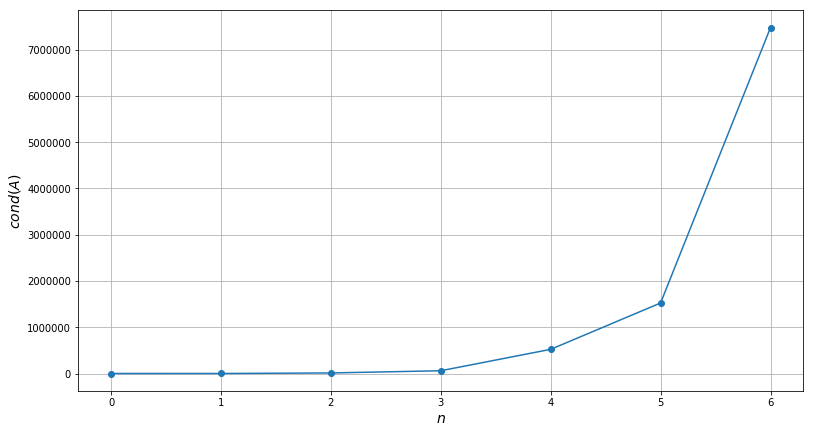

In [106]:
import matplotlib.pyplot as plt
cond_n = []
for i in range(1, m + 2):
    cond_n.append(np.linalg.cond(matrix_create(i), np.inf))
plt.figure(figsize=(13, 7))
plt.plot(cond_n, 'o-')
plt.ylabel('$cond(A)$', size=14)
plt.xlabel('$n$', size=14)
plt.grid(True)
plt.show()